In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!pip install mtcnn
!pip install keras_vggface keras_applications

In [ ]:
!unzip archive.zip

Archive:  archive.zip
replace data/train/ben_afflek/httpcsvkmeuaeccjpg.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [30]:
from mtcnn.mtcnn import MTCNN
import cv2
import numpy as np
from keras_vggface.utils import preprocess_input
from keras_vggface.vggface import VGGFace 
from scipy.spatial.distance import cosine

import warnings 
warnings.filterwarnings("ignore", category=Futurewarning)

NameError: ignored

In [29]:
! pip install git+https://github.com/rcmalli/keras-vggface.git
!pip install keras_applications --no-deps
filename = "/usr/local/lib/python3.7/dist-packages/keras_vggface/models.py"
text = open(filename).read()
open(filename, "w+").write(text.replace('keras.engine.topology', 'tensorflow.keras.utils'))
import tensorflow as tf

from keras_vggface.vggface import VGGFace


  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-dce8meqv
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-dce8meqv


In [21]:
image=cv2.imread('data/train/ben_afflek/httpcsvkmeuaeccjpg.jpg')

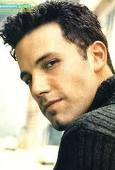

In [22]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [8]:
detector = MTCNN()

faces=detector.detect_faces(image)
for face in faces:
  print(face)

{'box': [20, 35, 71, 88], 'confidence': 0.9996923208236694, 'keypoints': {'left_eye': (29, 73), 'right_eye': (54, 63), 'nose': (37, 90), 'mouth_left': (42, 108), 'mouth_right': (63, 100)}}


In [12]:
def create_bbox(image):
  faces=detector.detect_faces(image)
  bounding_box=faces[0]['box']

  cv2.rectangle(image, 
                (bounding_box[0], bounding_box[1]),
                (bounding_box[0]+bounding_box[2], bounding_box[1]+bounding_box[3]),
                (0, 155, 255),
                2)
  return image

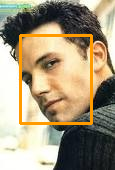

In [23]:
cv2_imshow(create_bbox(image))

In [24]:
def extract_face(image, resize=(224, 224)):
  image= cv2.imread(image)

  faces=detector.detect_faces(image)
  x1, y1, width, height = faces[0]['box']
  x2, y2 = x1 + width, y1 + height

  face_boundary = image[y1:y2,x1:x2]

  face_image = cv2.resize(face_boundary, resize)

  return face_image


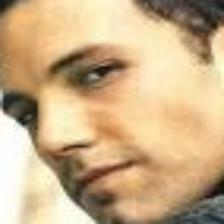

In [27]:
face_image = extract_face('data/train/ben_afflek/httpcsvkmeuaeccjpg.jpg')
cv2_imshow(face_image)

In [31]:
def get_embedding(faces):
  face = np.asarray(faces, "float32")
  face=preprocess_input(face, version=2)
  model=VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling = 'avg')
  return model.predict(face)

In [35]:
def get_similarity(faces):
  embeddings = get_embedding(faces)

  score = cosine(embeddings[0], embeddings[1])

  if score <= 0.5:
    return "face matched", score

  return "face Not matched", score

In [33]:
faces= [extract_face(image) for image in ['/content/2.jpg', 'data/train/ben_afflek/httpcsvkmeuaeccjpg.jpg' ]]

In [36]:
get_similarity(faces)

('face Not matched', 0.7475915253162384)

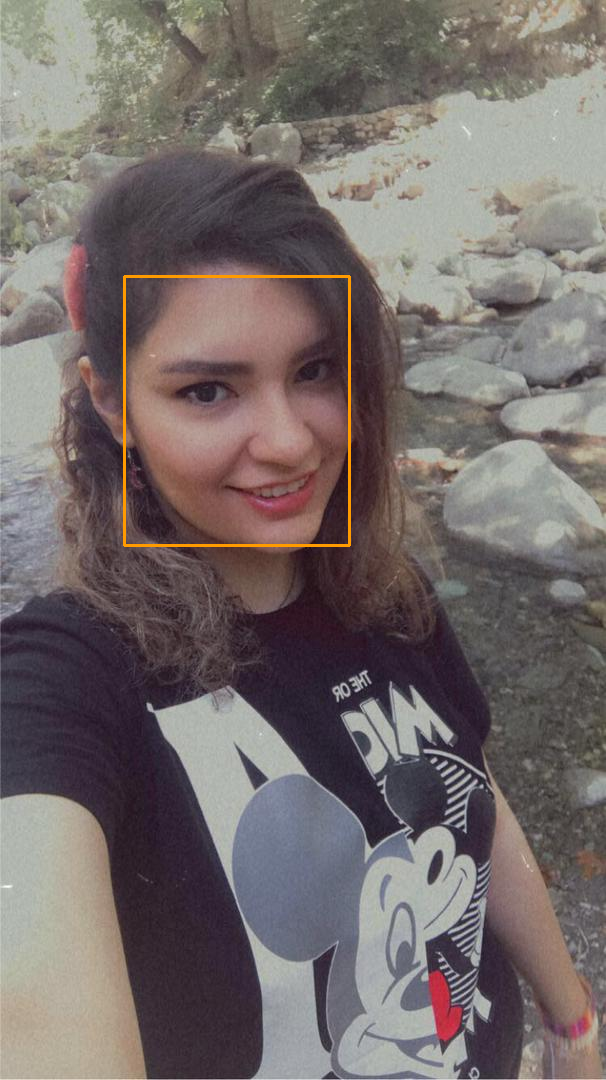

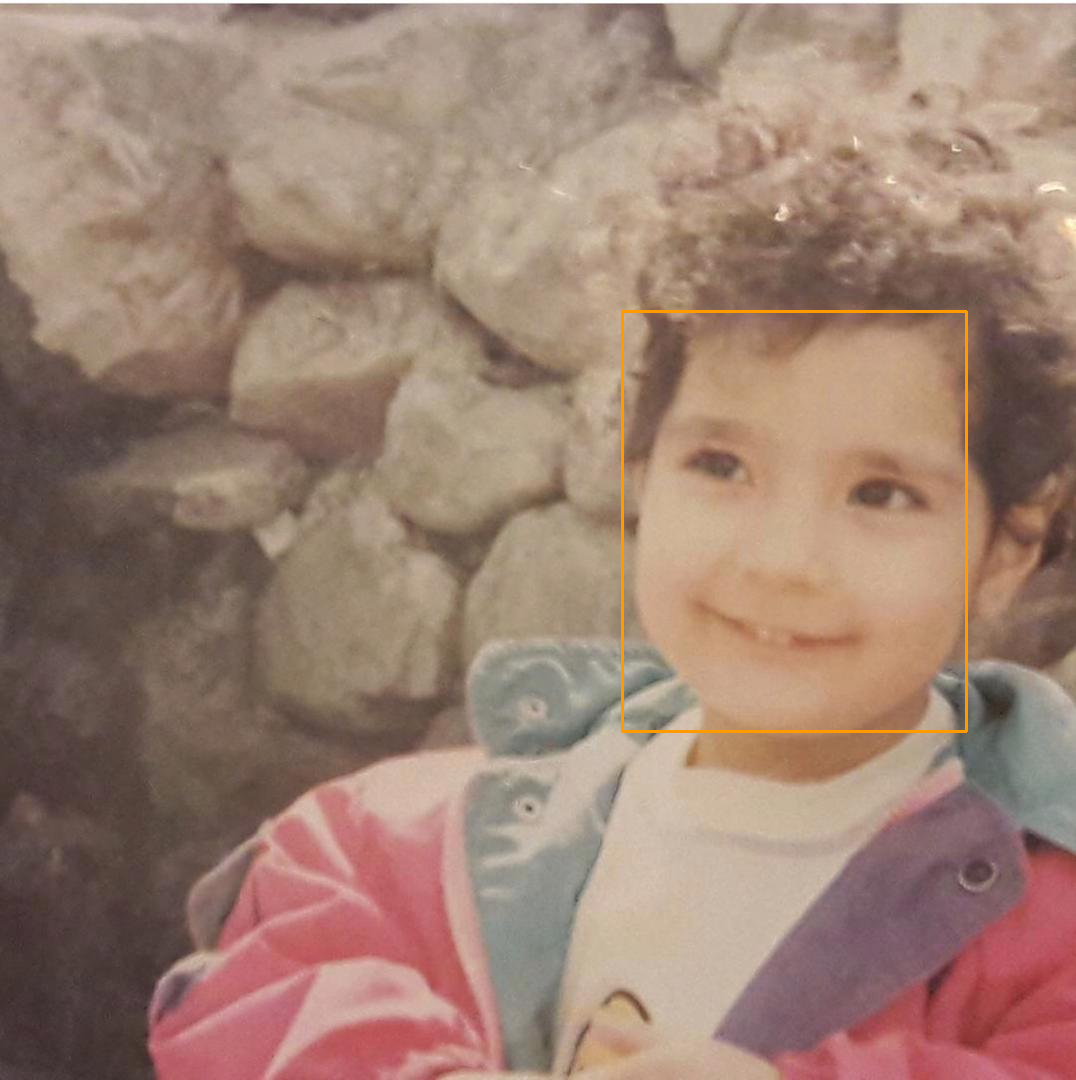

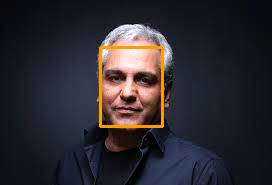

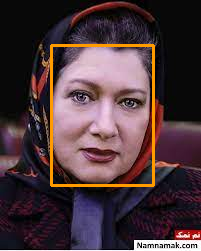

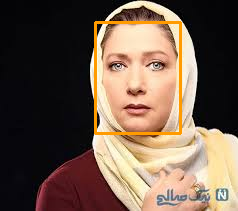

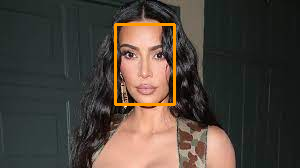

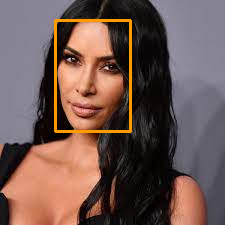

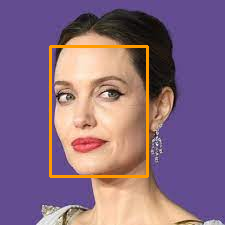

In [37]:
img_list=['/content/1.jpg', '/content/2.jpg', '/content/download.jpg', '/content/fariba.jpg', '/content/fariba1.jpg', '/content/index.jpg', '/content/index1.jpg','/content/index2.jpg']
for image in img_list:
  face_image = create_bbox(cv2.imread(image))
  cv2_imshow(face_image)

In [39]:
faces= [extract_face(image) for image in ['/content/fariba.jpg', '/content/fariba1.jpg' ]]
get_similarity(faces)

('face matched', 0.3166503310203552)